In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math



In [5]:
# This is the function for scipy odeint that helps it to solve the diff equation
# Differential equation
def helper(t, theta):
    theta, z = theta
    dthetadt = [z, f * math.cos(Omega * t) - omegaSQ * math.sin(theta) - lamda * z]
    return dthetadt

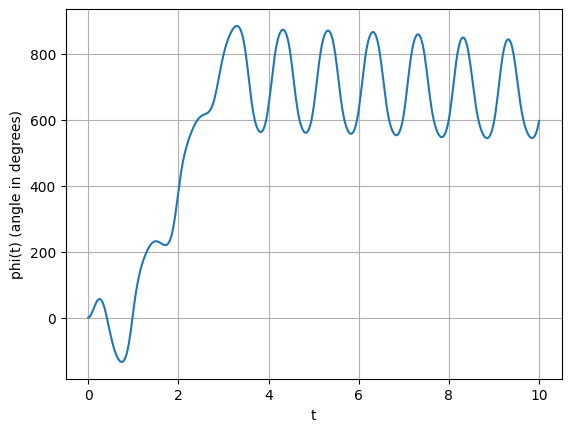

In [6]:
# Parameters
Omega = 2 * np.pi
omega = Omega * 1.5
lamda = omega / 2
omegaSQ = omega ** 2
gamma = 1.05 #0.8
f = gamma * omegaSQ
# t domain start
start = 0
# end
end = 10
t = np.linspace(start, end, 501)
initial_conditions = [0, 0]
sol = solve_ivp(helper, [start, end], initial_conditions, t_eval=t, method='LSODA', rtol=1e-6, atol=1e-8)
plt.plot(t, (sol.y[0] * 180) / (np.pi))

plt.xlabel('t')
plt.ylabel('phi(t) (angle in degrees)')
plt.grid(True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

On iteration  -6
On iteration  -7
On iteration  -8
On iteration  -9
On iteration  -10
On iteration  -11
On iteration  -12
On iteration  -13


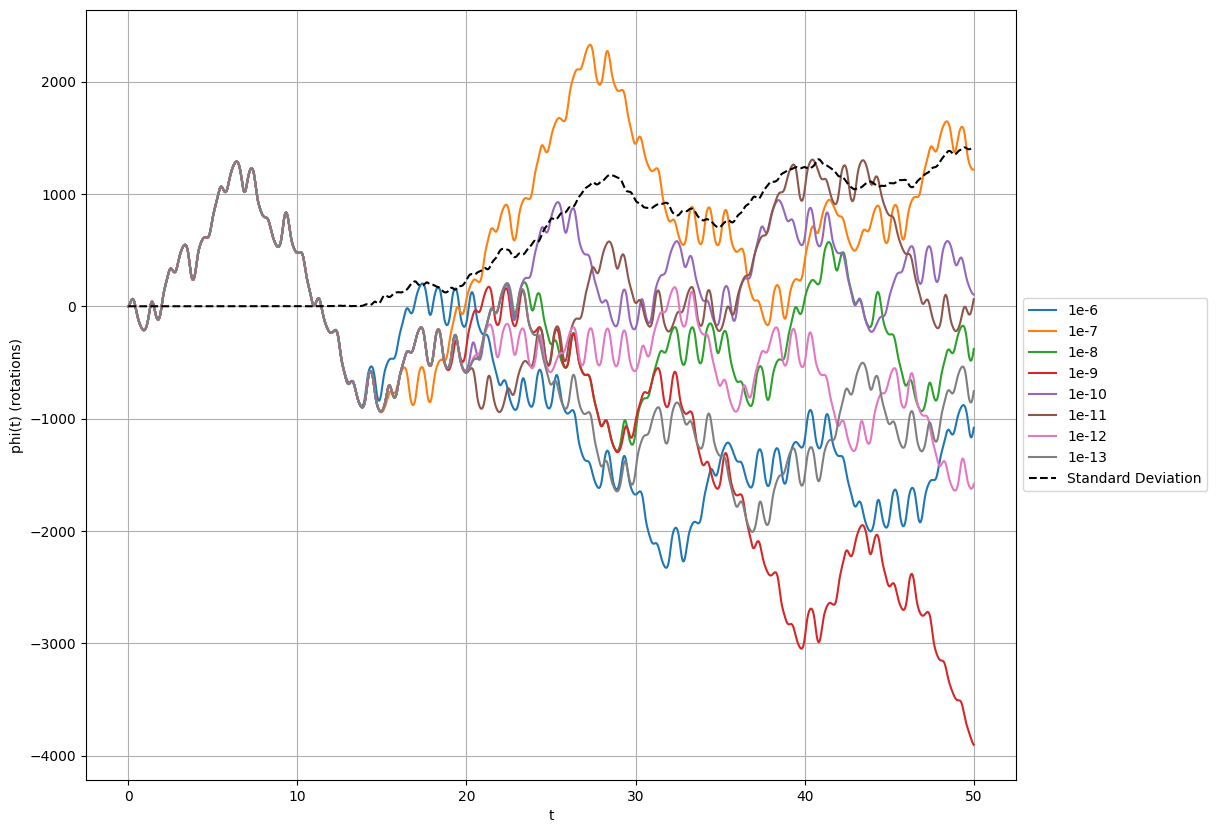

In [7]:
# Parameters
Omega = 2 * np.pi
omega = Omega * 1.5
lamda = omega / 2
omegaSQ = omega ** 2
gamma = 1.2
f = gamma * omegaSQ

t = np.linspace(0, 50, 5001)
initial_conditions = [0, 0]
solutions = []

# Loop over different rtol and atol values
for i in range(-6, -14, -1):  # goes from 1e-6 to 1e-15
    print("On iteration ", i)
    # Solve the differential equation
    sol = solve_ivp(helper, [0, 50], initial_conditions, t_eval=t, method='LSODA', rtol=10**(i), atol=10**(i-2))
    solutions.append(sol.y[0])
    
solutions = np.array(solutions)
# Calculate the standard deviation of solutions
std_dev = np.std(solutions, axis=0)

# Plotting
plt.figure(figsize=(12, 10))
for i, solution in enumerate(solutions):
    plt.plot(t, (solution * 180) / (np.pi), label=f"1e{-6-i}")

# Plot the standard deviation
plt.plot(t, (std_dev * 180) / (np.pi), label='Standard Deviation', color='black', linestyle='--')

plt.xlabel('t')
plt.ylabel('phi(t) (rotations)')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
threshold = 0.0001  # Define the threshold
last_t_value = None
for idx in range(len(t)-1, -1, -1):  # Iterate from the last index to the first
    if std_dev[idx] < threshold:
        last_t_value = t[idx]
        break

print("Last t-value with std_dev <", threshold, ":", last_t_value)

Last t-value with std_dev < 0.0001 : 11.55
